In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
#import pickle5 as pickle
import seaborn as sns
import itertools
#import mixedRVMI as mx
#import preprocessing_functions as pp
#import whittaker_smooth as ws
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.signal import detrend
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV


sns.set(rc={'figure.figsize':(20,10)})

In [ ]:
df = pd.read_csv('dataset_anomalie_coltivabili.csv')
df = df[list(filter(lambda x: 'NDVI' not in x, df.columns.tolist()))]

In [ ]:
df = df[list(filter(lambda x: '1w' not in x, df.columns.tolist()))]

In [ ]:
features = df.iloc[:, 13:].columns.tolist() # a seconda del dataset impiegato, prendo le features o le anomalie delle features

In [ ]:
df[list(filter(lambda x: '4w' in x and '24w' not in x, df.columns.tolist()))].head()

,Adda_SnowDepth_Mean_4w,Dora_SnowDepth_Mean_4w,Garda-Mincio_SnowDepth_Mean_4w,Oglio-Iseo_SnowDepth_Mean_4w,Piemonte-nord_SnowDepth_Mean_4w,Piemonte-sud_SnowDepth_Mean_4w,Ticino_SnowDepthMean_4w,LagoComo_Altezza_4w,Maggiore_Altezza_4w,Lugano_Altezza_4w,...,Temp4w_adda,Temp4w_dora,Temp4w_emiliani1,Temp4w_emiliani2,Temp4w_garda,Temp4w_lambro,Temp4w_oglio,Temp4w_piemonte nord,Temp4w_piemonte sud,Temp4w_ticino
0,55.719780,60.970357,44.559524,67.030612,43.437122,22.809505,57.117920,-0.186071,0.406071,270.438357,...,-0.363536,-1.513141,4.035384,3.135162,2.246471,4.075708,1.506876,2.352636,4.380463,0.247981
1,55.557692,66.298553,41.895833,66.127551,44.201957,20.030487,57.765377,-0.220536,0.354286,270.433250,...,-0.414453,-1.708758,4.430627,3.465863,2.599414,4.324461,1.698619,2.599900,4.709925,0.323533
2,55.876374,71.465070,38.848214,65.178571,45.224215,17.070219,61.687004,-0.243393,0.312500,270.427286,...,0.560761,-1.108677,5.739020,4.630684,3.875485,5.501260,2.945709,3.581071,5.576384,1.295578
3,57.832418,77.663285,36.785714,66.678571,47.917178,16.270368,63.263294,-0.253214,0.282500,270.415179,...,0.331739,-1.918750,6.288862,4.976058,4.212425,6.052812,3.116105,3.581625,5.618922,0.899457
4,59.093407,83.132589,34.544643,67.515306,50.415909,16.212798,63.252183,-0.259821,0.245714,270.396143,...,1.365427,-0.931688,7.097624,5.887527,5.152644,6.985402,4.091886,4.654057,6.409146,1.907981


In [ ]:
features = df.iloc[:, 13:]
cols = features.columns.tolist()

for col in cols:
  df[col] = pd.to_numeric(df[col])

df[cols] = df[cols].interpolate()

In [ ]:
feat4w = list(filter(lambda x: '4w' in x and not '24w' in x, features.columns.tolist()))

feat4w = features[feat4w]



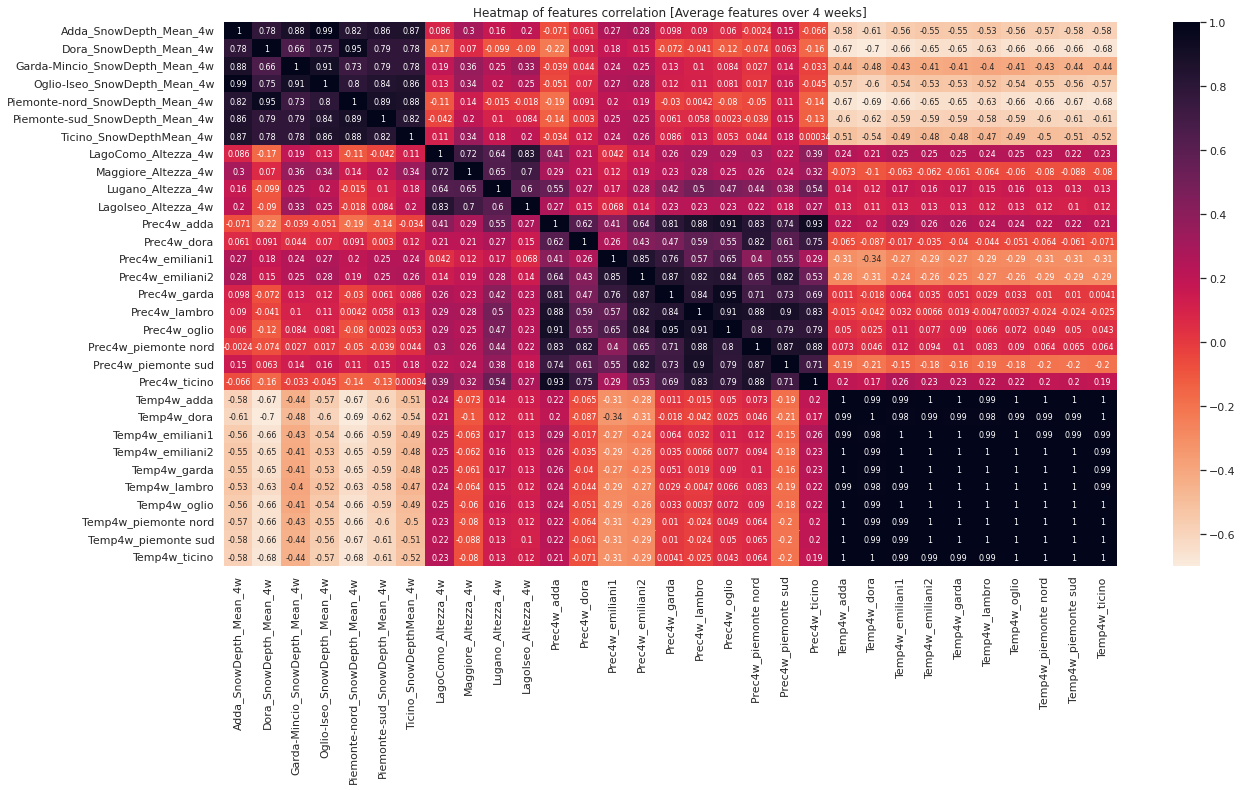

In [ ]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(feat4w.corr(), annot=True, cmap='rocket_r', annot_kws={"size": 8}, ax=ax).set_title('Heatmap of features correlation [Average features over 4 weeks]')


In [ ]:
df = pd.read_csv('cultivable_pca.csv')

In [ ]:
features = df.iloc[:, 13:]

In [ ]:
feat4w = list(filter(lambda x: '4w' in x and not '24w' in x, features.columns.tolist()))

feat4w = features[feat4w]


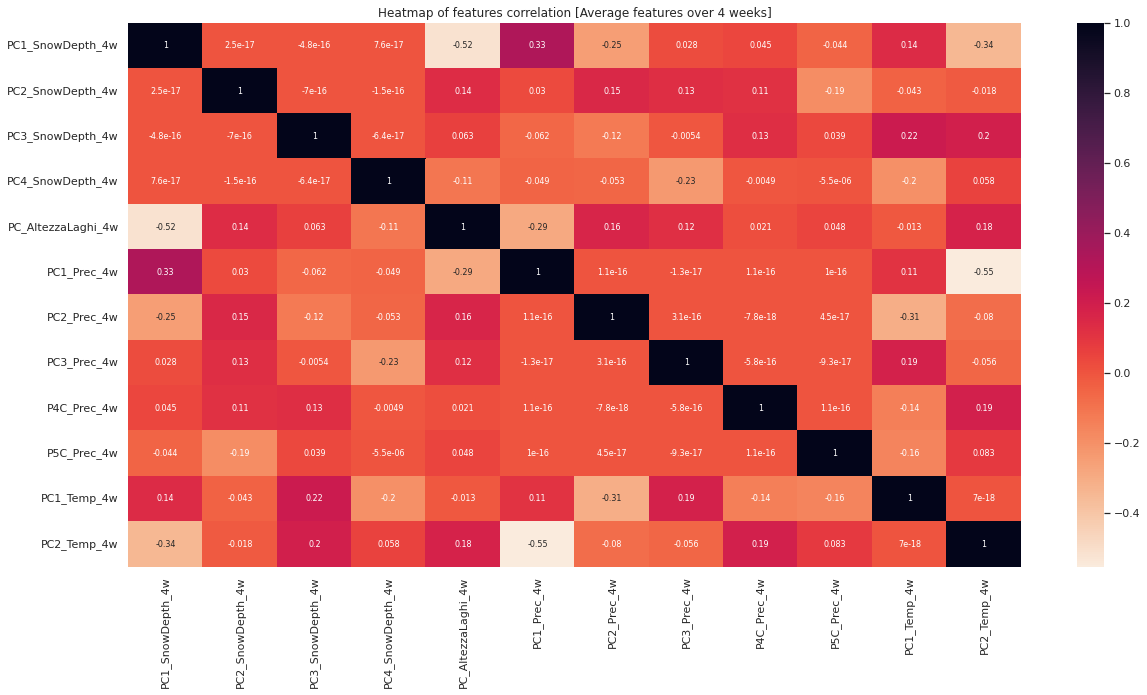

In [ ]:
# plotting correlation heatmap
fig, ax = plt.subplots(figsize=(20,10))
dataplot = sns.heatmap(feat4w.corr(), annot=True, cmap='rocket_r', annot_kws={"size": 8}, ax=ax).set_title('Heatmap of features correlation [Average features over 4 weeks]')


# PCA su nevi

In [ ]:
snowdepth = list(filter(lambda x: 'SnowDepth' in x, df.columns.tolist()))
snowdepth4w = list(filter(lambda x: '4w' in x and not '24w' in x, snowdepth))
#snowdepth1w = list(filter(lambda x: '1w' in x, snowdepth))
snowdepth8w = list(filter(lambda x: '8w' in x, snowdepth))
snowdepth12w = list(filter(lambda x: '12w' in x, snowdepth))
snowdepth16w = list(filter(lambda x: '16w' in x, snowdepth))
snowdepth24w = list(filter(lambda x: '24w' in x, snowdepth))

In [ ]:
#snow_1w = df[snowdepth1w]
snow_4w = df[snowdepth4w]
snow_8w = df[snowdepth8w]
snow_12w = df[snowdepth12w]
snow_16w = df[snowdepth16w]
snow_24w = df[snowdepth24w]

## Varianza associata area intera

In [ ]:
pca = PCA()
pca.fit_transform(snow_4w)
comp = pca.components_
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.87841878, 0.06284651, 0.02324206, 0.02060049, 0.01289219,
       0.00101809, 0.00098187])

In [ ]:
pca = PCA(4)
pcSnow4w = pca.fit_transform(snow_4w)

In [ ]:
pca = PCA()
pca.fit_transform(snow_8w)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.86741645e-01, 5.96584372e-02, 2.17978499e-02, 1.80919927e-02,
       1.19392177e-02, 9.05887557e-04, 8.64969937e-04])

In [ ]:
pca = PCA(4)
pcSnow8w = pca.fit_transform(snow_8w)

In [ ]:
pca = PCA()
pca.fit_transform(snow_12w)
pca.explained_variance_ratio_

array([8.90936958e-01, 5.77959420e-02, 2.19528316e-02, 1.67837034e-02,
       1.08547562e-02, 8.63736517e-04, 8.12072091e-04])

In [ ]:
pca = PCA(4)
pcSnow12w = pca.fit_transform(snow_12w)

In [ ]:
pca = PCA()
pca.fit_transform(snow_16w)
pca.explained_variance_ratio_

array([8.91434790e-01, 5.73329938e-02, 2.29190872e-02, 1.67356750e-02,
       9.91839924e-03, 8.57544166e-04, 8.01510669e-04])

In [ ]:
pca = PCA(4)
pcSnow16w = pca.fit_transform(snow_16w)

In [ ]:
pca = PCA()
pca.fit_transform(snow_24w)
pca.explained_variance_ratio_

array([0.8826845 , 0.06063771, 0.02717342, 0.01867458, 0.00899602,
       0.00094696, 0.00088681])

In [ ]:
pca = PCA(4)
pcSnow24w = pca.fit_transform(snow_24w)

# PCA su laghi

In [ ]:
laghi = df.filter(regex='LagoComo|Maggiore|Lugano|LagoIseo')
#laghi1w = laghi.filter(regex='1w')
laghi4w = laghi[list(filter(lambda x: '4w' in x and not '24w' in x, laghi))]
laghi8w = laghi.filter(regex='8w')
laghi12w = laghi.filter(regex='12w')
laghi16w = laghi.filter(regex='16w')
laghi24w = laghi.filter(regex='24w')

Prendo solo la prima componente che spiega il 99% della varianza

In [ ]:
pca = PCA()
pcLaghi1w= pca.fit_transform(laghi16w)
pca.explained_variance_ratio_
pca.components_[0]

array([-0.00895346, -0.01009435, -0.00229513, -0.99990633])

In [ ]:
pca = PCA(1)
pcLaghi4w = pca.fit_transform(laghi4w)
explained_variance = pca.explained_variance_ratio_


In [ ]:
pca = PCA(1)
pcLaghi8w = pca.fit_transform(laghi8w)
explained_variance = pca.explained_variance_ratio_


In [ ]:
pca = PCA(1)
pcLaghi12w = pca.fit_transform(laghi12w)
explained_variance = pca.explained_variance_ratio_


In [ ]:
pca = PCA(1)
pcLaghi16w = pca.fit_transform(laghi16w)
explained_variance = pca.explained_variance_ratio_


In [ ]:
pca = PCA(1)
pcLaghi24w= pca.fit_transform(laghi24w)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.99986282])

# PCA su piogge

In [ ]:
prec_df = df.filter(regex='Prec')

## Varianza associata area intera

In [ ]:
#prec1w = prec_df.filter(regex='1w')
prec4w = prec_df[list(filter(lambda x: '4w' in x and not '24w' in x, prec_df.columns.tolist()))]
prec8w = prec_df.filter(regex='8w')
prec12w = prec_df.filter(regex='12w')
prec16w = prec_df.filter(regex='16w')
prec24w = prec_df.filter(regex='24w')

In [ ]:
pca = PCA(5)
pcPrec4w = pca.fit_transform(prec4w)
pca.explained_variance_ratio_

array([0.75586897, 0.12217675, 0.05530771, 0.03620152, 0.00975088])

In [ ]:
pca = PCA(5)
pcPrec8w = pca.fit_transform(prec8w)
pca.explained_variance_ratio_

array([0.75505882, 0.12220998, 0.05944983, 0.0337426 , 0.00915398])

In [ ]:
pca = PCA(5)
pcPrec12w = pca.fit_transform(prec12w)
pca.explained_variance_ratio_

array([0.73813196, 0.13312873, 0.06419636, 0.03374596, 0.00971438])

In [ ]:
pca = PCA(5)
pcPrec16w = pca.fit_transform(prec16w)
pca.explained_variance_ratio_

array([0.72697621, 0.14121636, 0.06556055, 0.03412011, 0.01025391])

In [ ]:
pca = PCA(5)
pcPrec24w = pca.fit_transform(prec24w)
pca.explained_variance_ratio_

array([0.71791404, 0.14661311, 0.06393965, 0.03520105, 0.01214362])

# PCA su temperature

In [ ]:
temp_df = df.filter(regex='Temp')

## Varianza associata area intera

In [ ]:
#temp1w = temp_df.filter(regex='1w')
temp4w = temp_df[list(filter(lambda x: '4w' in x and not '24w' in x, temp_df.columns.tolist()))]
temp8w = temp_df.filter(regex='8w')
temp12w = temp_df.filter(regex='12w')
temp16w = temp_df.filter(regex='16w')
temp24w = temp_df.filter(regex='24w')

In [ ]:
pca = PCA()
pca.fit_transform(temp4w)
pca.explained_variance_ratio_

array([9.95697288e-01, 2.45335109e-03, 7.99577610e-04, 6.01334578e-04,
       1.74648378e-04, 9.59863162e-05, 7.97567015e-05, 3.94963356e-05,
       3.25467625e-05, 2.60142255e-05])

In [ ]:
pca = PCA(2)
pcTemp4w = pca.fit_transform(temp4w)

In [ ]:
pca = PCA()
pca.fit_transform(temp8w)
pca.explained_variance_ratio_

array([9.96655729e-01, 1.80542671e-03, 6.81512710e-04, 5.05269146e-04,
       1.39065498e-04, 8.00979171e-05, 5.45184903e-05, 3.32312720e-05,
       2.49732675e-05, 2.01763816e-05])

In [ ]:
pca = PCA(2)
pcTemp8w = pca.fit_transform(temp8w)

In [ ]:
pca = PCA()
pca.fit_transform(temp12w)
pca.explained_variance_ratio_

array([9.96990920e-01, 1.56822234e-03, 6.50541530e-04, 4.72526652e-04,
       1.26304081e-04, 7.51116056e-05, 4.45067440e-05, 3.21316425e-05,
       2.24054143e-05, 1.73303963e-05])

In [ ]:
pca = PCA(2)
pcTemp12w = pca.fit_transform(temp12w)

In [ ]:
pca = PCA()
pca.fit_transform(temp16w)
pca.explained_variance_ratio_

array([9.97052711e-01, 1.48635786e-03, 6.75762483e-04, 4.73472535e-04,
       1.24283147e-04, 7.62475956e-05, 3.98645789e-05, 3.35280292e-05,
       2.18496815e-05, 1.59233063e-05])

In [ ]:
pca = PCA(2)
pcTemp16w = pca.fit_transform(temp16w)

In [ ]:
pca = PCA()
pca.fit_transform(temp24w)
pca.explained_variance_ratio_[0]

0.9966732880041785

In [ ]:
pca = PCA(2)
pcTemp24w = pca.fit_transform(temp24w)

# Costruzione nuovo dataset

In [ ]:
new_df = df[['Date','Year','Week']]
new_df = pd.concat([new_df, df.filter(regex='anomalia')],axis=1)

In [ ]:
principalSnowDepth4w = pd.DataFrame(data = np.hstack([pcSnow4w,pcSnow8w, pcSnow12w, pcSnow16w, pcSnow24w])
             , columns = ['PC1_SnowDepth_4w', 'PC2_SnowDepth_4w' ,'PC3_SnowDepth_4w', 'PC4_SnowDepth_4w', 
                          'PC1_SnowDepth_8w', 'PC2_SnowDepth_8w' ,'PC3_SnowDepth_8w', 'PC4_SnowDepth_8w',
                          'PC1_SnowDepth_12w', 'PC2_SnowDepth_12w' ,'PC3_SnowDepth_12w', 'PC4_SnowDepth_12w',
                          'PC1_SnowDepth_16w', 'PC2_SnowDepth_16w' ,'PC3_SnowDepth_16w', 'PC4_SnowDepth_16w',
                          'PC1_SnowDepth_24w', 'PC2_SnowDepth_24w' ,'PC3_SnowDepth_24w', 'PC4_SnowDepth_24w'])

In [ ]:
new_df = pd.concat([new_df,principalSnowDepth4w],axis=1)

In [ ]:
pcLaghi = pd.DataFrame(data = np.hstack([pcLaghi4w,pcLaghi8w,pcLaghi12w,pcLaghi16w, pcLaghi24w])
             , columns = ['PC_AltezzaLaghi_4w' , 'PC_AltezzaLaghi_8w', 'PC_AltezzaLaghi_12w', 'PC_AltezzaLaghi_16w',
                          'PC_AltezzaLaghi_24w'])

In [ ]:
new_df = pd.concat([new_df, pcLaghi],axis=1)

In [ ]:
pcPrec= pd.DataFrame(data = np.hstack([pcPrec4w,pcPrec8w,pcPrec12w,pcPrec16w, pcPrec24w])
             , columns = ['PC1_Prec_4w' , 'PC2_Prec_4w', 'PC3_Prec_4w', 'P4C_Prec_4w', 'P5C_Prec_4w',
                          'PC1_Prec_8w' , 'PC2_Prec_8w', 'PC3_Prec_8w', 'P4C_Prec_8w', 'P5C_Prec_8w',
                          'PC1_Prec_12w' , 'PC2_Prec_12w', 'PC3_Prec_12w', 'P4C_Prec_12w', 'P5C_Prec_12w',
                          'PC1_Prec_16w' , 'PC2_Prec_16w', 'PC3_Prec_16w', 'P4C_Prec_16w', 'P5C_Prec_16w',
                          'PC1_Prec_24w' , 'PC2_Prec_24w', 'PC3_Prec_24w', 'P4C_Prec_24w', 'P5C_Prec_42w',])

In [ ]:
new_df = pd.concat([new_df, pcPrec],axis=1)

In [ ]:
pcTemperature = pd.DataFrame(data = np.hstack([pcTemp4w,pcTemp8w,pcTemp12w,pcTemp16w, pcTemp24w]), 
              columns = [ 'PC1_Temp_4w', 'PC2_Temp_4w','PC1_Temp_8w', 'PC2_Temp_8w', 'PC1_Temp_12w', 'PC2_Temp_12w', 'PC1_Temp_16w',
                          'PC2_Temp_16w', 'PC1_Temp_24w', 'PC2_Temp_24w'])

In [ ]:
new_df = pd.concat([new_df, pcTemperature],axis=1)

ho più che dimezzato il numero di features

In [ ]:
new_df

,Date,Year,Week,anomalia_adda,anomalia_dora,anomalia_emiliani1,anomalia_emiliani2,anomalia_garda,anomalia_lambro,anomalia_oglio,...,PC1_Temp_4w,PC2_Temp_4w,PC1_Temp_8w,PC2_Temp_8w,PC1_Temp_12w,PC2_Temp_12w,PC1_Temp_16w,PC2_Temp_16w,PC1_Temp_24w,PC2_Temp_24w
0,2000-02-20,2000,7,-0.040373,-0.048006,-0.017890,-0.032433,-0.076673,-0.068592,-0.052193,...,27.620180,1.596733,-31.518065,1.151887,-31.129808,1.218633,26.214120,0.827289,-13.903656,0.583077
1,2000-02-27,2000,8,-0.033085,-0.050458,-0.008446,-0.015238,-0.068462,-0.063635,-0.037494,...,26.982936,1.138857,-29.803294,0.816374,-30.576896,0.971676,28.086175,0.634246,-15.699027,0.488901
2,2000-03-05,2000,9,-0.037256,-0.066148,-0.015465,-0.013517,-0.074402,-0.069215,-0.028342,...,23.609112,0.748306,-28.737361,0.978830,-30.419049,0.648064,29.484760,0.592129,-17.752877,0.397759
3,2000-03-12,2000,10,-0.040029,-0.056693,-0.016502,-0.010025,-0.062694,-0.063294,-0.023070,...,23.349992,-0.530903,-27.317124,0.416431,-29.628889,0.404535,29.647553,0.522200,-19.413822,0.308518
4,2000-03-19,2000,11,-0.044534,-0.057331,-0.014892,-0.010137,-0.054540,-0.063500,-0.025200,...,20.369866,-0.217883,-23.969816,0.587669,-27.753002,0.635815,28.372524,0.824965,-20.534622,0.409709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2019-12-08,2019,49,0.038598,0.035884,0.040869,0.063125,0.061757,0.053201,0.011285,...,15.031477,-3.004439,-4.384162,-1.360476,2.642356,-0.793027,-9.309394,-0.865174,18.145277,-0.472359
1034,2019-12-15,2019,50,0.044416,0.039950,0.042862,0.064720,0.060372,0.061694,0.016525,...,17.679643,-1.815215,-7.996236,-1.353136,-1.027562,-0.814585,-6.026777,-0.769491,15.967064,-0.439833
1035,2019-12-22,2019,51,0.049811,0.044178,0.043816,0.084256,0.062305,0.066672,0.071307,...,19.741748,-0.647564,-12.481217,-1.235898,-4.959979,-0.946200,-2.264330,-0.692955,12.975147,-0.581030
1036,2019-12-29,2019,52,0.066220,0.049025,0.049780,0.102385,0.065004,0.072415,0.114367,...,19.721340,-0.124394,-15.653602,-1.294650,-7.483577,-0.946065,0.797914,-0.686154,10.756108,-0.587870


In [ ]:
new_df.to_csv('cultivable_pca.csv', index=False)